In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/perdue/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# intially done with lasagne_conv_out_job1459975916.txt - this is wrong (imgh was 68 instead of 50)
with np.load('models/lminerva_betax_first_test.npz') as fx:
    param_values_x = [fx['arr_%d' % i] for i in range(len(fx.files))]
    
# see lasagne_conv_out_job1460659049.txt
with np.load('models/lminerva_betau_first_test.npz') as fu:
    param_values_u = [fu['arr_%d' % i] for i in range(len(fu.files))]
    
# see lasagne_conv_out_job1460659053.txt
with np.load('models/lminerva_betav_first_test.npz') as fv:
    param_values_v = [fv['arr_%d' % i] for i in range(len(fv.files))]

In [3]:
with np.load('models/lminervatriamese_epsilon1461294983.npz') as fe:
    param_values_xuv = [fe['arr_%d' % i] for i in range(len(fe.files))]

In [4]:
with np.load('models/initial_parameters_random_epsilon.npz') as fr:
    param_values_rand = [fr['arr_%d' % i] for i in range(len(fr.files))]

In [5]:
print len(param_values_x)
layer_names_x = {0:'conv-x1', 1:'bias-x1', 2:'conv-x2', 3:'bias-x2', 4:'conv-x3', 5:'bias-x3',
                 6:'conv-x4', 7:'bias-x4', 8:'dense-x5', 9:'bias-x5', 10:'dense-x6', 11:'bias-x6', 
                 12:'dense-x7', 13:'bias-x7'}
for i, p in enumerate(param_values_x):
    print "{:02d}, {:15s}, {}".format(i, layer_names_x[i], np.shape(p))

14
00, conv-x1        , (12, 1, 8, 3)
01, bias-x1        , (12,)
02, conv-x2        , (20, 12, 7, 3)
03, bias-x2        , (20,)
04, conv-x3        , (28, 20, 6, 3)
05, bias-x3        , (28,)
06, conv-x4        , (36, 28, 6, 3)
07, bias-x4        , (36,)
08, dense-x5       , (6480, 196)
09, bias-x5        , (196,)
10, dense-x6       , (196, 98)
11, bias-x6        , (98,)
12, dense-x7       , (98, 11)
13, bias-x7        , (11,)


In [6]:
print len(param_values_u)
layer_names_u = {0:'conv-u1', 1:'bias-u1', 2:'conv-u2', 3:'bias-u2', 4:'conv-u3', 5:'bias-u3',
                 6:'conv-u4', 7:'bias-u4', 8:'dense-u5', 9:'bias-u5', 10:'dense-u6', 11:'bias-u6', 
                 12:'dense-u7', 13:'bias-u7'}
for i, p in enumerate(param_values_u):
    print "{:02d}, {:15s}, {}".format(i, layer_names_u[i], np.shape(p))

14
00, conv-u1        , (12, 1, 8, 5)
01, bias-u1        , (12,)
02, conv-u2        , (20, 12, 7, 3)
03, bias-u2        , (20,)
04, conv-u3        , (28, 20, 6, 3)
05, bias-u3        , (28,)
06, conv-u4        , (36, 28, 6, 3)
07, bias-u4        , (36,)
08, dense-u5       , (1620, 196)
09, bias-u5        , (196,)
10, dense-u6       , (196, 98)
11, bias-u6        , (98,)
12, dense-u7       , (98, 11)
13, bias-u7        , (11,)


In [7]:
print len(param_values_v)
layer_names_v = {0:'conv-v1', 1:'bias-v1', 2:'conv-v2', 3:'bias-v2', 4:'conv-v3', 5:'bias-v3',
                 6:'conv-v4', 7:'bias-v4', 8:'dense-v5', 9:'bias-v5', 10:'dense-v6', 11:'bias-v6', 
                 12:'dense-v7', 13:'bias-v7'}
for i, p in enumerate(param_values_v):
    print "{:02d}, {:15s}, {}".format(i, layer_names_v[i], np.shape(p))

14
00, conv-v1        , (12, 1, 8, 5)
01, bias-v1        , (12,)
02, conv-v2        , (20, 12, 7, 3)
03, bias-v2        , (20,)
04, conv-v3        , (28, 20, 6, 3)
05, bias-v3        , (28,)
06, conv-v4        , (36, 28, 6, 3)
07, bias-v4        , (36,)
08, dense-v5       , (1620, 196)
09, bias-v5        , (196,)
10, dense-v6       , (196, 98)
11, bias-v6        , (98,)
12, dense-v7       , (98, 11)
13, bias-v7        , (11,)


In [8]:
print len(param_values_xuv)
layer_names_xuv = {
    0:'conv-x1', 1:'bias-x1', 2:'conv-x2', 3:'bias-x2', 4:'conv-x3', 5:'bias-x3', 6:'conv-x4', 7:'bias-x4', 
    8:'dense-x5', 9:'bias-x5', 
    10:'conv-u1', 11:'bias-u1', 12:'conv-u2', 13:'bias-u2', 14:'conv-u3', 15:'bias-u3', 16:'conv-u4', 17:'bias-u4', 
    18:'dense-u5', 19:'bias-u5', 
    20:'conv-v1', 21:'bias-v1', 22:'conv-v2', 23:'bias-v2', 24:'conv-v3', 25:'bias-v3', 26:'conv-v4', 27:'bias-v4', 
    28:'dense-v5', 29:'bias-v5',
    30:'dense-across6', 31:'bias-across6', 32:'dense-across7', 33:'bias-across7'
}
for i, p in enumerate(param_values_xuv):
    print "{:02d}, {:15s}, {}".format(i, layer_names_xuv[i], np.shape(p))

34
00, conv-x1        , (12, 1, 8, 3)
01, bias-x1        , (12,)
02, conv-x2        , (20, 12, 7, 3)
03, bias-x2        , (20,)
04, conv-x3        , (28, 20, 6, 3)
05, bias-x3        , (28,)
06, conv-x4        , (36, 28, 6, 3)
07, bias-x4        , (36,)
08, dense-x5       , (4536, 196)
09, bias-x5        , (196,)
10, conv-u1        , (12, 1, 8, 5)
11, bias-u1        , (12,)
12, conv-u2        , (20, 12, 7, 3)
13, bias-u2        , (20,)
14, conv-u3        , (28, 20, 6, 3)
15, bias-u3        , (28,)
16, conv-u4        , (36, 28, 6, 3)
17, bias-u4        , (36,)
18, dense-u5       , (1620, 196)
19, bias-u5        , (196,)
20, conv-v1        , (12, 1, 8, 5)
21, bias-v1        , (12,)
22, conv-v2        , (20, 12, 7, 3)
23, bias-v2        , (20,)
24, conv-v3        , (28, 20, 6, 3)
25, bias-v3        , (28,)
26, conv-v4        , (36, 28, 6, 3)
27, bias-v4        , (36,)
28, dense-v5       , (1620, 196)
29, bias-v5        , (196,)
30, dense-across6  , (588, 98)
31, bias-across6   , (98,)
32,

In [9]:
print len(param_values_rand)
layer_names_rand = {
    0:'conv-x1', 1:'bias-x1', 2:'conv-x2', 3:'bias-x2', 4:'conv-x3', 5:'bias-x3', 6:'conv-x4', 7:'bias-x4', 
    8:'dense-x5', 9:'bias-x5', 
    10:'conv-u1', 11:'bias-u1', 12:'conv-u2', 13:'bias-u2', 14:'conv-u3', 15:'bias-u3', 16:'conv-u4', 17:'bias-u4', 
    18:'dense-u5', 19:'bias-u5', 
    20:'conv-v1', 21:'bias-v1', 22:'conv-v2', 23:'bias-v2', 24:'conv-v3', 25:'bias-v3', 26:'conv-v4', 27:'bias-v4', 
    28:'dense-v5', 29:'bias-v5',
    30:'dense-across6', 31:'bias-across6', 32:'dense-across7', 33:'bias-across7'
}
for i, p in enumerate(param_values_rand):
    print "{:02d}, {:15s}, {}".format(i, layer_names_rand[i], np.shape(p))

34
00, conv-x1        , (12, 1, 8, 3)
01, bias-x1        , (12,)
02, conv-x2        , (20, 12, 7, 3)
03, bias-x2        , (20,)
04, conv-x3        , (28, 20, 6, 3)
05, bias-x3        , (28,)
06, conv-x4        , (36, 28, 6, 3)
07, bias-x4        , (36,)
08, dense-x5       , (4536, 196)
09, bias-x5        , (196,)
10, conv-u1        , (12, 1, 8, 5)
11, bias-u1        , (12,)
12, conv-u2        , (20, 12, 7, 3)
13, bias-u2        , (20,)
14, conv-u3        , (28, 20, 6, 3)
15, bias-u3        , (28,)
16, conv-u4        , (36, 28, 6, 3)
17, bias-u4        , (36,)
18, dense-u5       , (1620, 196)
19, bias-u5        , (196,)
20, conv-v1        , (12, 1, 8, 5)
21, bias-v1        , (12,)
22, conv-v2        , (20, 12, 7, 3)
23, bias-v2        , (20,)
24, conv-v3        , (28, 20, 6, 3)
25, bias-v3        , (28,)
26, conv-v4        , (36, 28, 6, 3)
27, bias-v4        , (36,)
28, dense-v5       , (1620, 196)
29, bias-v5        , (196,)
30, dense-across6  , (588, 98)
31, bias-across6   , (98,)
32,

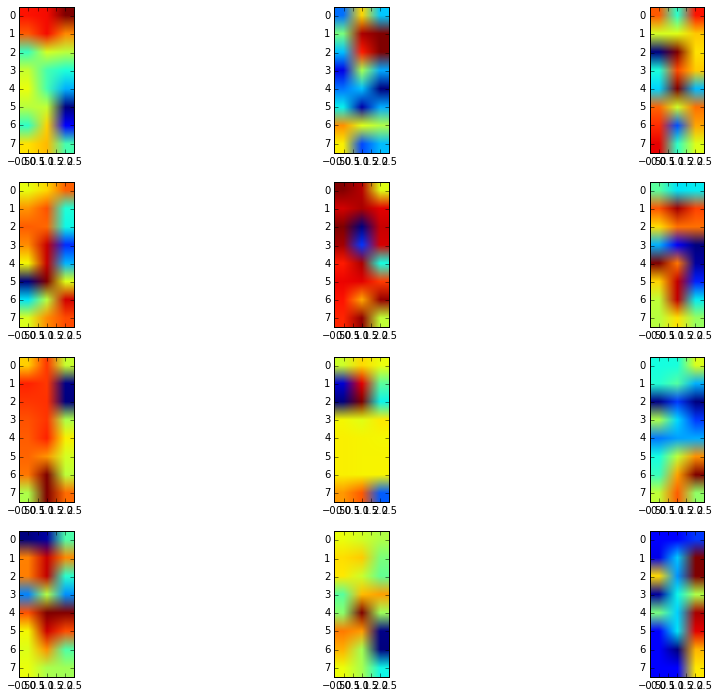

In [10]:
# look at first x convolution
fig = plt.figure(figsize=(16, 12))
gs = plt.GridSpec(4, 3)
for i in range(0, 12):
    ax = plt.subplot(gs[i])
    ax.imshow(param_values_x[0][i][0], interpolation=None)

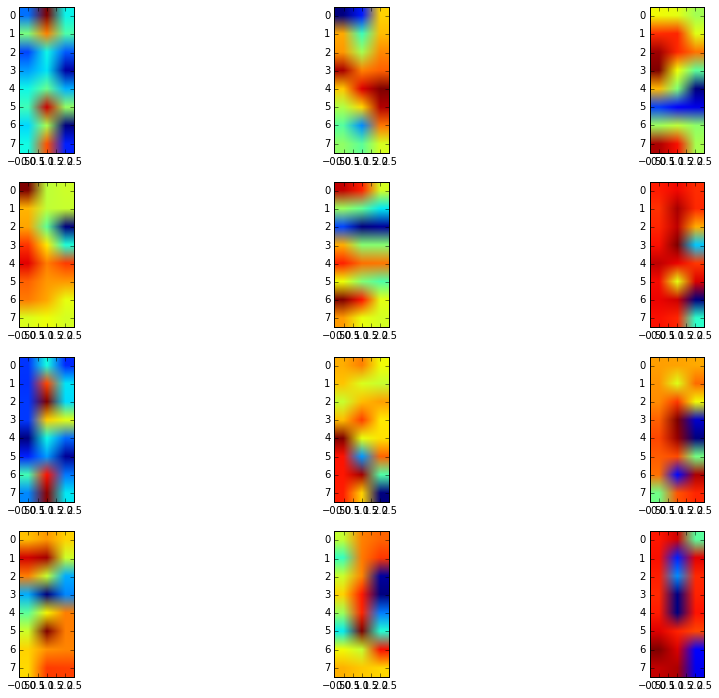

In [11]:
# look at first x convolution
fig = plt.figure(figsize=(16, 12))
gs = plt.GridSpec(4, 3)
for i in range(0, 12):
    ax = plt.subplot(gs[i])
    ax.imshow(param_values_xuv[0][i][0], interpolation=None)

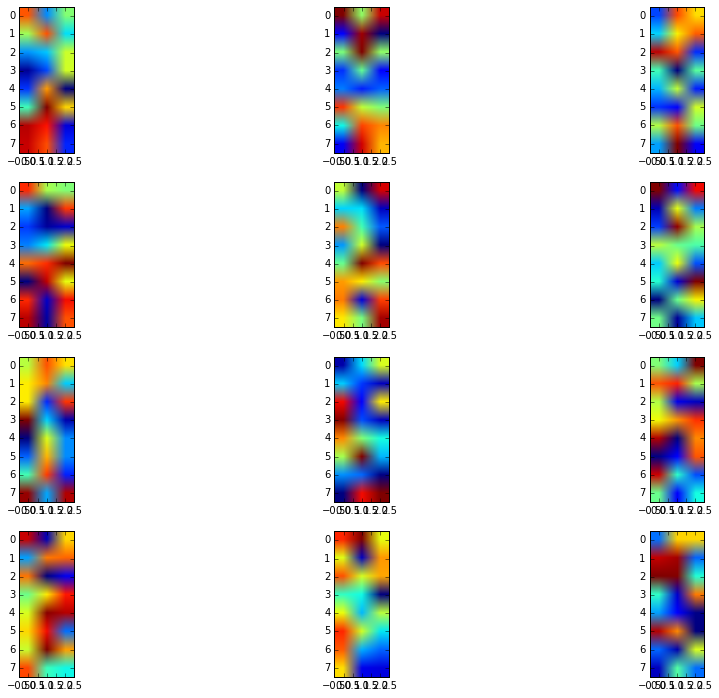

In [12]:
# look at first x convolution
fig = plt.figure(figsize=(16, 12))
gs = plt.GridSpec(4, 3)
for i in range(0, 12):
    ax = plt.subplot(gs[i])
    ax.imshow(param_values_rand[0][i][0], interpolation=None)

In [13]:
# copy single view training into the `rand` array
for i in range(8):
    param_values_rand[i] = param_values_x[i]

for i in range(8):
    j = i + 10
    param_values_rand[j] = param_values_u[i]
    
for i in range(8):
    j = i + 20
    param_values_rand[j] = param_values_v[i]

In [14]:
for i, p in enumerate(param_values_rand):
    print "{:02d}, {:15s}, {}".format(i, layer_names_rand[i], np.shape(p))

00, conv-x1        , (12, 1, 8, 3)
01, bias-x1        , (12,)
02, conv-x2        , (20, 12, 7, 3)
03, bias-x2        , (20,)
04, conv-x3        , (28, 20, 6, 3)
05, bias-x3        , (28,)
06, conv-x4        , (36, 28, 6, 3)
07, bias-x4        , (36,)
08, dense-x5       , (4536, 196)
09, bias-x5        , (196,)
10, conv-u1        , (12, 1, 8, 5)
11, bias-u1        , (12,)
12, conv-u2        , (20, 12, 7, 3)
13, bias-u2        , (20,)
14, conv-u3        , (28, 20, 6, 3)
15, bias-u3        , (28,)
16, conv-u4        , (36, 28, 6, 3)
17, bias-u4        , (36,)
18, dense-u5       , (1620, 196)
19, bias-u5        , (196,)
20, conv-v1        , (12, 1, 8, 5)
21, bias-v1        , (12,)
22, conv-v2        , (20, 12, 7, 3)
23, bias-v2        , (20,)
24, conv-v3        , (28, 20, 6, 3)
25, bias-v3        , (28,)
26, conv-v4        , (36, 28, 6, 3)
27, bias-v4        , (36,)
28, dense-v5       , (1620, 196)
29, bias-v5        , (196,)
30, dense-across6  , (588, 98)
31, bias-across6   , (98,)
32, de

In [15]:
np.savez('./transfer_to_epsilon_test1.npz', *param_values_rand)